# EMI Merge and Visualisations

In [2]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import math 

import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

## Load and merge all EMI Datasets (base/w2v, new dictionary and BERT)

In [7]:
# merge all the bert_files
bert_liane = pd.read_csv("../../data/emi_bert.csv")
bert_estelle = pd.read_csv("../../data/emi_bert_estelle_sample.csv")

print(len(bert_liane))
print(len(bert_estelle))

bert = pd.concat([bert_liane, bert_estelle])

len(bert)

111000
111600


222600

In [10]:
# load the individual datasets
base = pd.read_csv("../../data/tldr_cleaned.csv")
dict_adj = pd.read_csv("../../data/tldr_emi_dict.csv")

print(len(bert))
print(len(base))
print(len(dict_adj))

222600
615392
615392


In [11]:
# merge all three EMIs
combinded_df = pd.merge(base, dict_adj[["id", "emi_dict"]], on="id")
print(len(combinded_df))
combinded_df = pd.merge(combinded_df, bert, on="id", how="outer")
print(len(combinded_df))
combinded_df.columns

615392
615392


Index(['Unnamed: 0', 'subreddit', 'subreddit_id', 'id', 'emi', 'emi_short',
       'emi_dict', 'emi_bert'],
      dtype='object')

In [15]:
# remove unnecessary (index-) column
combinded_df.drop(['Unnamed: 0'], axis=1, inplace=True)
combinded_df.columns

Index(['subreddit', 'subreddit_id', 'id', 'emi', 'emi_short', 'emi_dict',
       'emi_bert'],
      dtype='object')

In [ ]:
# Export file with all 
#combinded_df.to_csv("../../data/emi_data.csv", index=False)

## Import the merged EMI-data

In [18]:
# get EMIs EMI merged before
emi_data = pd.read_csv("../../data/emi_data.csv")
emi_data

,subreddit,subreddit_id,id,emi,emi_short,emi_dict,emi_bert
0,worldnews,t5_2qh13,2ef5,-0.133635,-0.990069,-0.171608,-0.061480
1,technology,t5_2qh16,5n0a,0.238289,0.932410,0.258639,0.140866
2,news,t5_2qh3l,71no,0.197142,-0.266843,0.113814,0.389299
3,depression,t5_2qqqf,802k,-0.266380,-0.213134,-0.253383,0.659833
4,technology,t5_2qh16,amaz,1.547950,2.486575,1.582274,0.192084
...,...,...,...,...,...,...,...
615387,AskMen,t5_2s30g,t3_zzwq2,0.447433,-0.673665,0.411636,NaN
615388,buildapc,t5_2rnve,t3_zzyai,3.339368,-0.350016,3.409126,NaN
615389,relationships,t5_2qjvn,t3_zzzd6,0.077625,0.568103,0.116399,NaN
615390,relationships,t5_2qjvn,t3_zzzn3,-0.240569,-0.353285,-0.306116,NaN


In [19]:
# only keep posts where we have the EMI scores for all 3 variants
emi_data_reducted = emi_data.dropna(subset=['emi_bert'])
emi_data_reducted

,subreddit,subreddit_id,id,emi,emi_short,emi_dict,emi_bert
0,worldnews,t5_2qh13,2ef5,-0.133635,-0.990069,-0.171608,-0.061480
1,technology,t5_2qh16,5n0a,0.238289,0.932410,0.258639,0.140866
2,news,t5_2qh3l,71no,0.197142,-0.266843,0.113814,0.389299
3,depression,t5_2qqqf,802k,-0.266380,-0.213134,-0.253383,0.659833
4,technology,t5_2qh16,amaz,1.547950,2.486575,1.582274,0.192084
...,...,...,...,...,...,...,...
614671,relationships,t5_2qjvn,t3_zpt9o,-0.354926,0.613244,-0.343568,-0.101676
614672,relationships,t5_2qjvn,t3_zpu75,-0.912262,-0.229802,-0.925412,0.072908
614673,AskMen,t5_2s30g,t3_zpu8v,-0.624629,-0.388253,-0.612287,-0.463326
614674,relationships,t5_2qjvn,t3_zpueb,0.430497,0.347947,0.431224,-0.258549


### Predefine colors <3

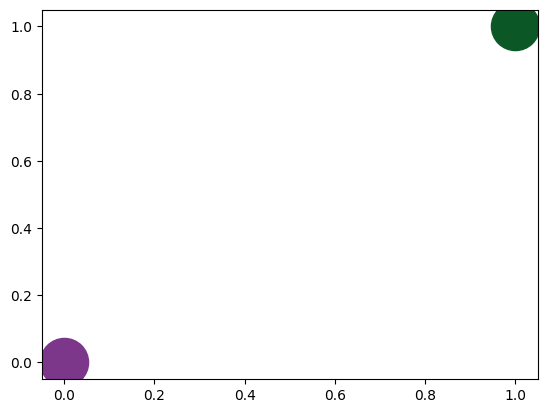

In [16]:
colormap = plt.get_cmap('PRGn')  
plt.scatter(x = [0], y = [0], s =1200, color= colormap(30), label = 'intuition')
plt.scatter(x = [1], y = [1], s =1200, color= colormap(245), label = 'evidence')
intColor = colormap(30)
evColor = colormap(245)
baseColor = colormap(45)


## Start with comparison of EMI scores of subreddits

### Show subreddits EMI score for base version

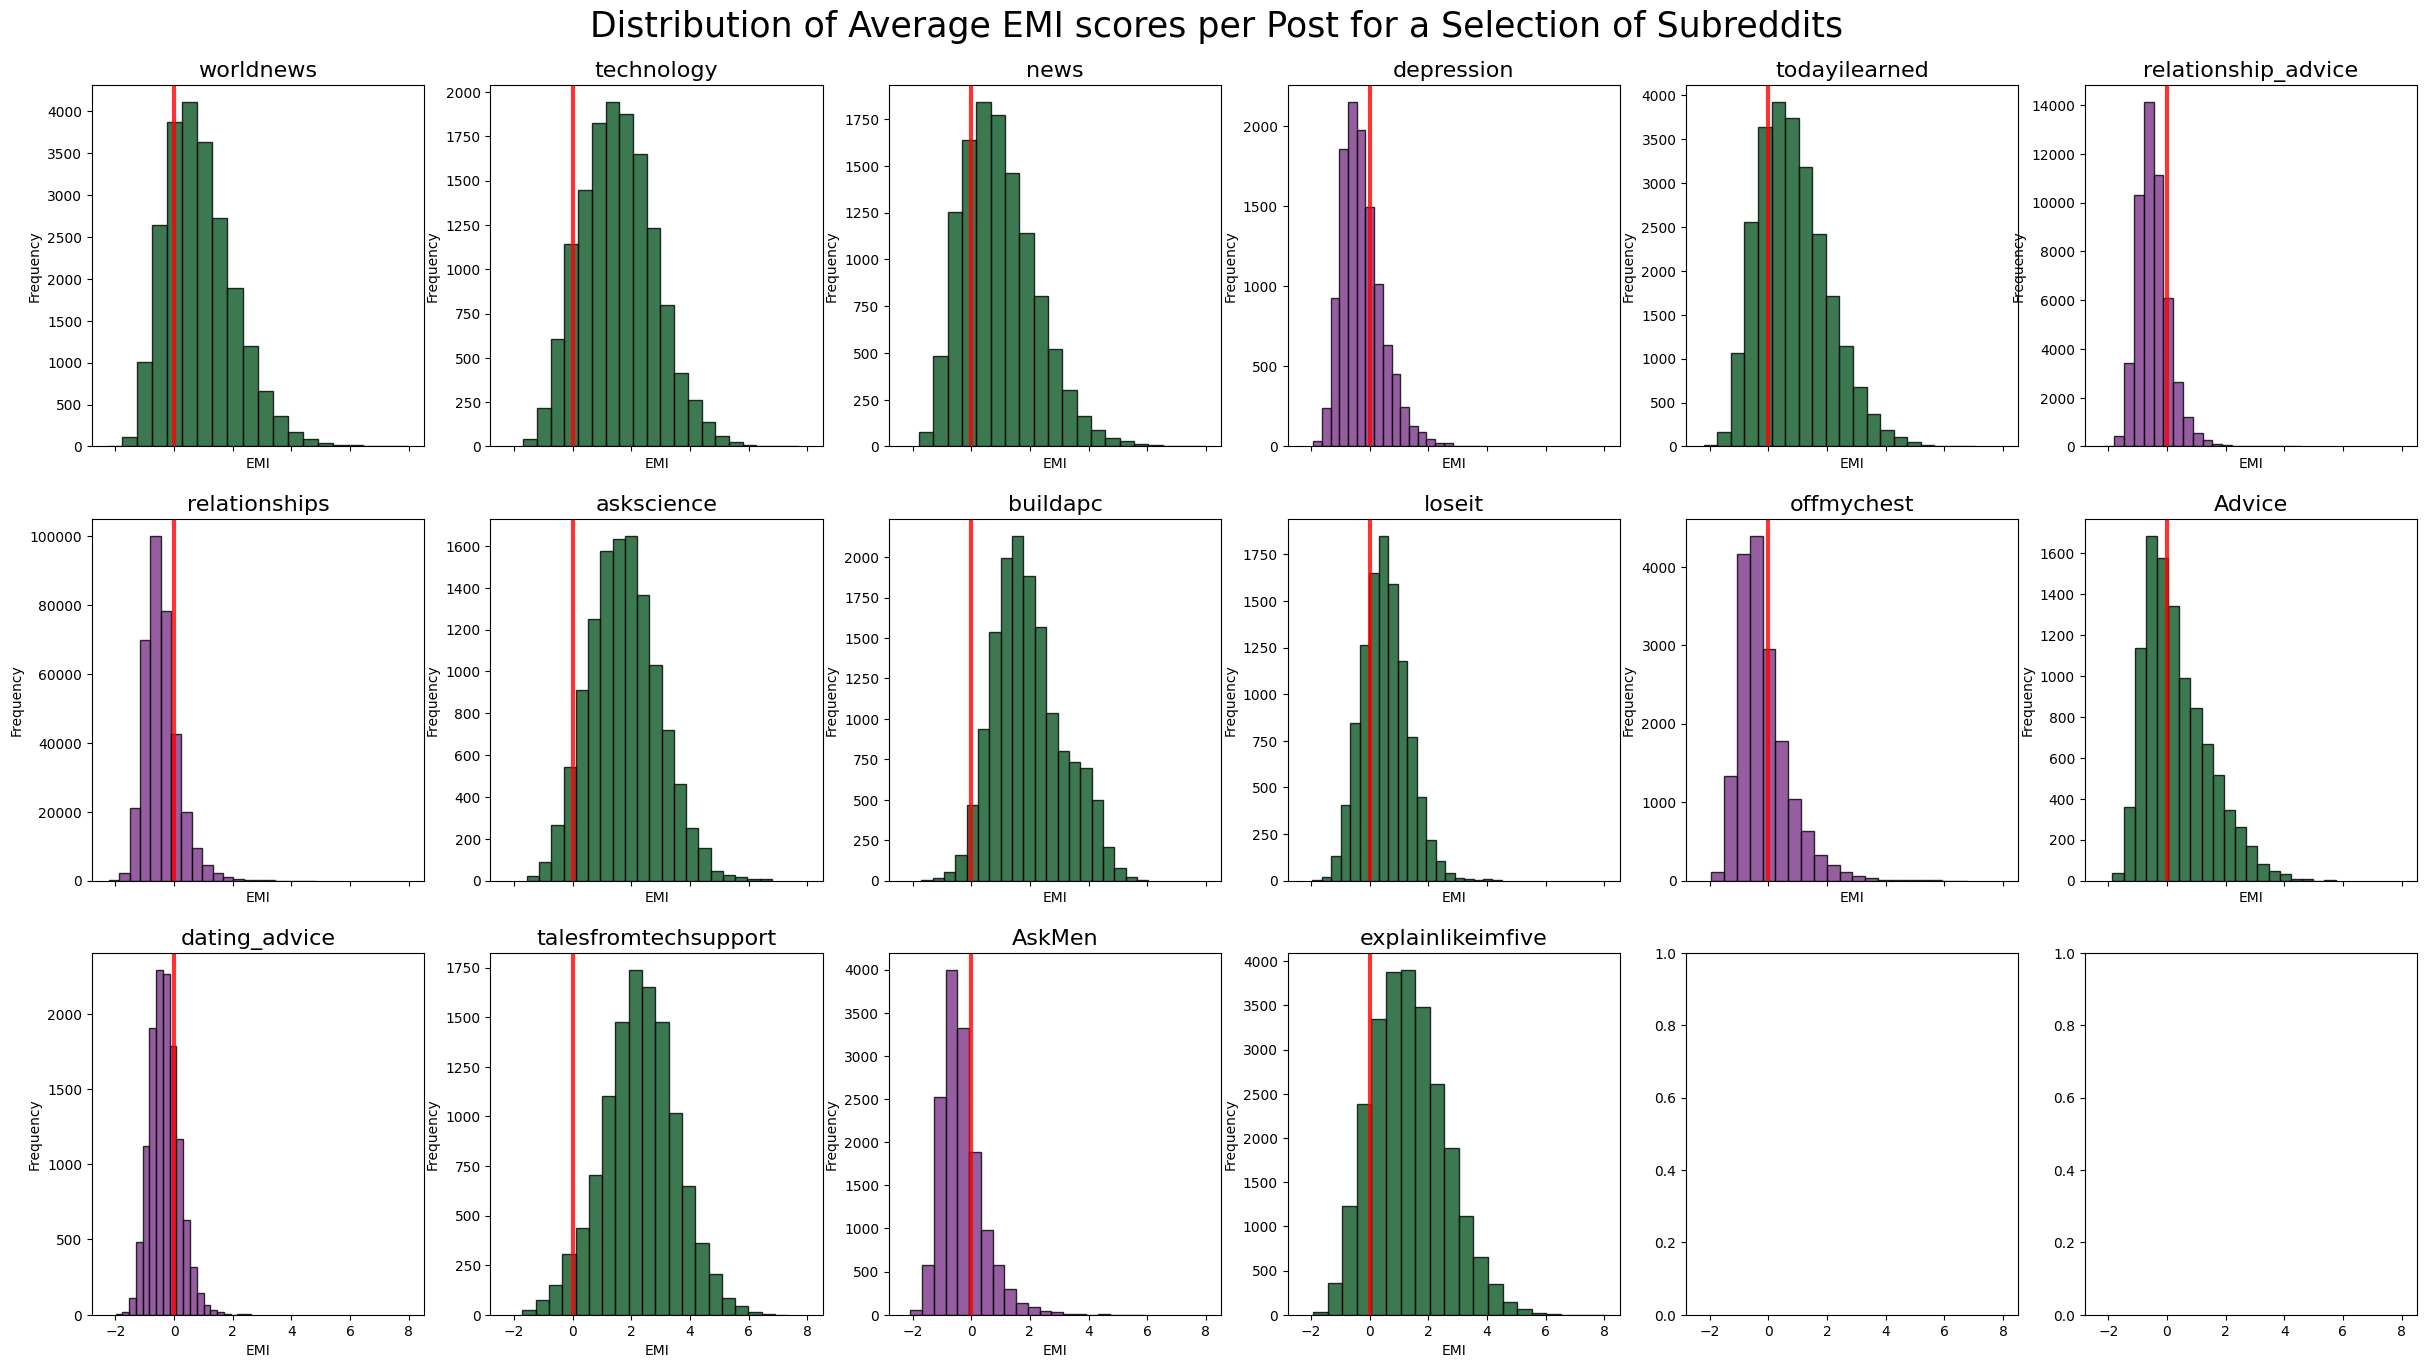

In [20]:
# to pandas for easier visualisation 
import math

# histograms 
subreddits = emi_data['subreddit'].unique()
num_subreddits = len(subreddits)

#plt.figure(figsize=(5 * num_subreddits, 15))
#fig, axs = plt.subplots(math.ceil(num_subreddits/4),4, figsize=(25, 20), sharex = True)
fig, axs = plt.subplots(3, 6, figsize=(30,15), sharex=True)
axs = axs.flatten()
for i, subreddit in enumerate(subreddits):
    #plt.subplot(2, round(num_subreddits/2), i + 1)
    subset = emi_data[emi_data['subreddit'] == subreddit]
    mean_emi = subset['emi'].mean()
    color = evColor if mean_emi > 0 else intColor
    axs[i].hist(subset['emi'], bins=20, color= color, edgecolor='black', alpha = 0.8)
    axs[i].set_title(subreddit, size = 16)
    axs[i].set_xlabel('EMI')
    axs[i].set_ylabel('Frequency')
    axs[i].axvline(0, color = 'red', linewidth = 3, alpha = 0.8 )
fig.suptitle('Distribution of Average EMI scores per Post for a Selection of Subreddits', fontsize = 25)
fig.subplots_adjust(top=0.93)
plt.show()

### EMI distribution for all subreddits with the different approaches

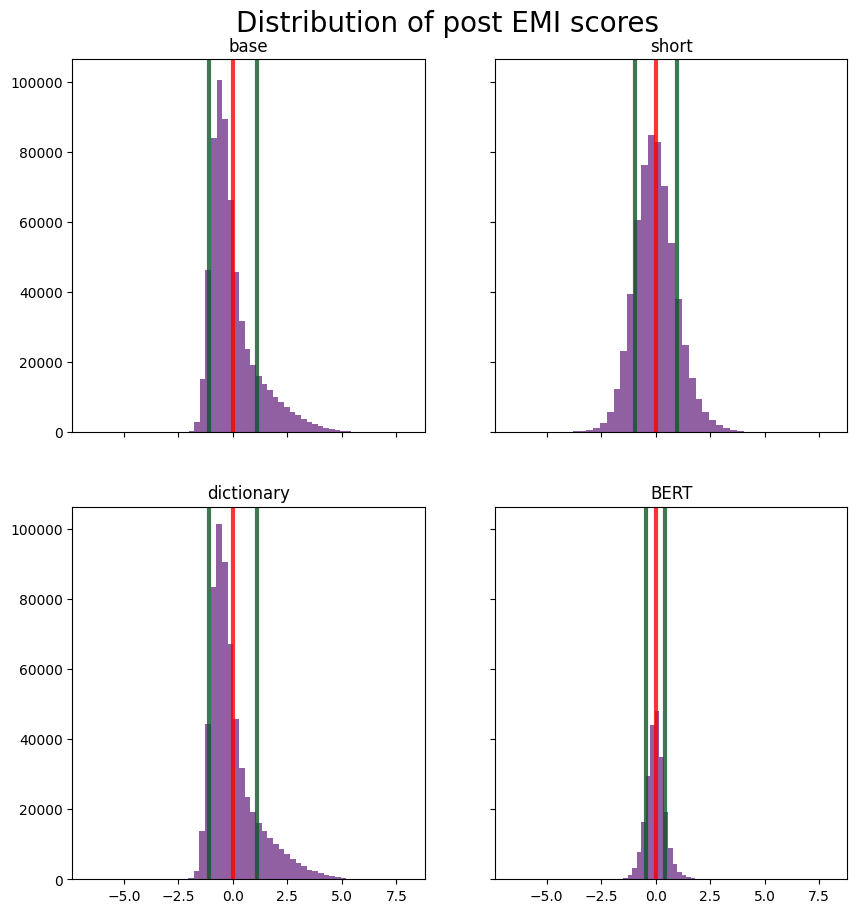

In [6]:
# für alle 4 (normal, tldr, anderes dict, BERT) sharex = True, sharey = True
emi_data 
methods = ['base', 'short', 'dictionary', 'BERT'] 
suffixes = ['', '_short', '_dict', '_bert']
fig, axs = plt.subplots(2,2, figsize=(10, 10), sharex = True, sharey = True)
for i, (method, suffix) in enumerate(zip(methods, suffixes)): 
    axs = axs.flatten()
    
    axs[i].hist(emi_data[f'emi{suffix}'], bins=40, color=baseColor)
    axs[i].axvline(emi_data[f'emi{suffix}'].mean(), color = 'red', linewidth = 3, alpha = 0.8)
    axs[i].axvline(emi_data[f'emi{suffix}'].mean()+emi_data[f'emi{suffix}'].std(), color = evColor, linewidth = 3, alpha = 0.8)
    axs[i].axvline(emi_data[f'emi{suffix}'].mean()-emi_data[f'emi{suffix}'].std(), color = evColor, linewidth = 3, alpha = 0.8)
    axs[i].set_title(f'{method}')
fig.suptitle('Distribution of post EMI scores', fontsize = 20)
fig.subplots_adjust(top=0.93)
plt.show()

## Barplots of EMI score for base version

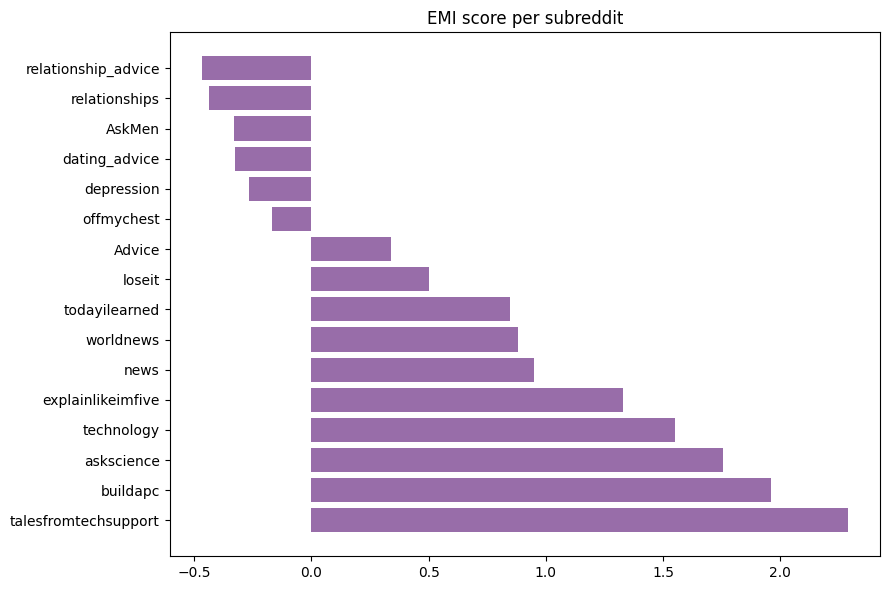

In [7]:
mean_subreddit_emi_df = pd.DataFrame(emi_data.groupby('subreddit')['emi'].mean().reset_index().rename(columns={'emi': 'mean_emi'})).sort_values('mean_emi')

plt.figure(figsize=(9, 6))
plt.barh(mean_subreddit_emi_df['subreddit'], mean_subreddit_emi_df['mean_emi'], color=colormap(50))
plt.gca().invert_yaxis()  
plt.title("EMI score per subreddit")
plt.tight_layout()
plt.show()


## Comparison tldr vs post 

### Show subreddits EMI score for base version

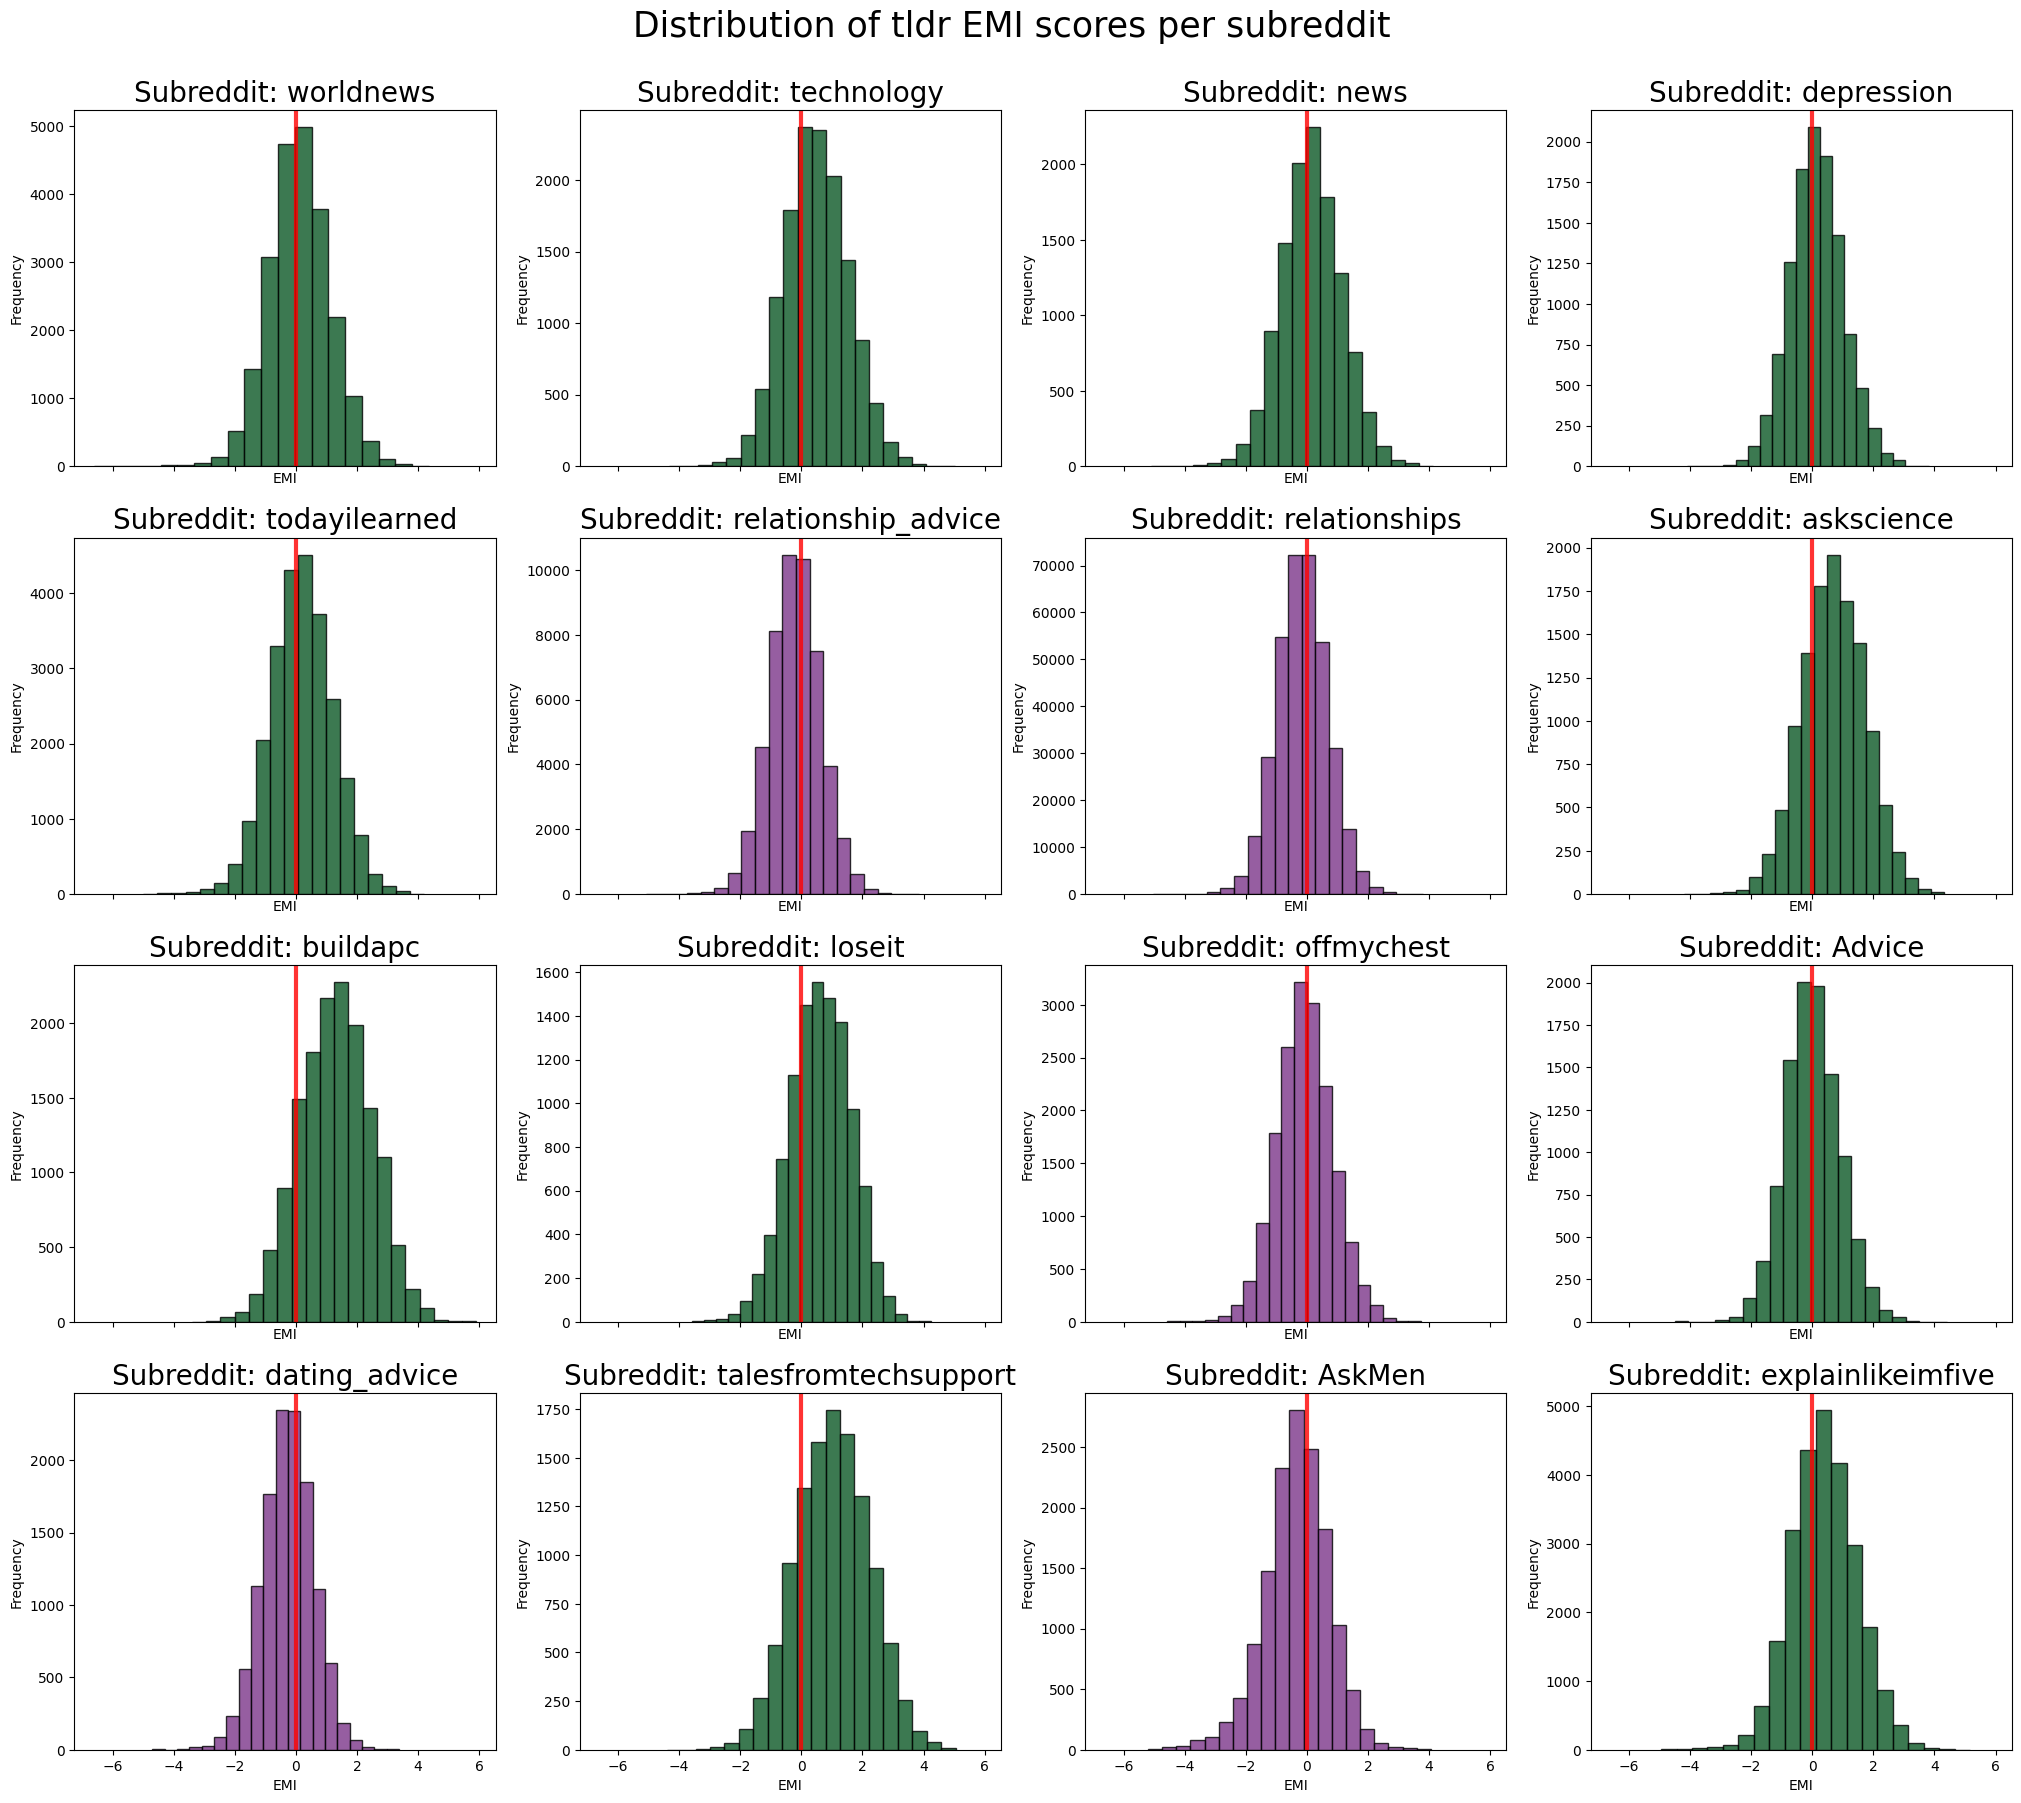

In [8]:
#plt.figure(figsize=(5 * num_subreddits, 15))
fig, axs = plt.subplots(math.ceil(num_subreddits/4),4, figsize=(25, 20), sharex = True)
axs = axs.flatten()
for i, subreddit in enumerate(subreddits):
    #plt.subplot(2, round(num_subreddits/2), i + 1)
    subset = emi_data[emi_data['subreddit'] == subreddit]
    mean_emi = subset['emi_short'].mean()
    color = evColor if mean_emi > 0 else intColor
    axs[i].hist(subset['emi_short'], bins=20, color= color, edgecolor='black', alpha = 0.8)
    axs[i].set_title(f"Subreddit: {subreddit}", size = 20)
    axs[i].set_xlabel('EMI')
    axs[i].set_ylabel('Frequency')
    axs[i].axvline(0, color = 'red', linewidth = 3, alpha = 0.8)
fig.suptitle('Distribution of tldr EMI scores per subreddit', fontsize = 25)
fig.subplots_adjust(top=0.93)
plt.show()

In [9]:
emi_data['diff'] = emi_data['emi'] - emi_data['emi_short']

### Compare distribution of EMI per subreddit of post EMI and tldr EMI

In [23]:
new_colors = plt.get_cmap('tab20c')
blue = new_colors(0)
orange = new_colors(4)

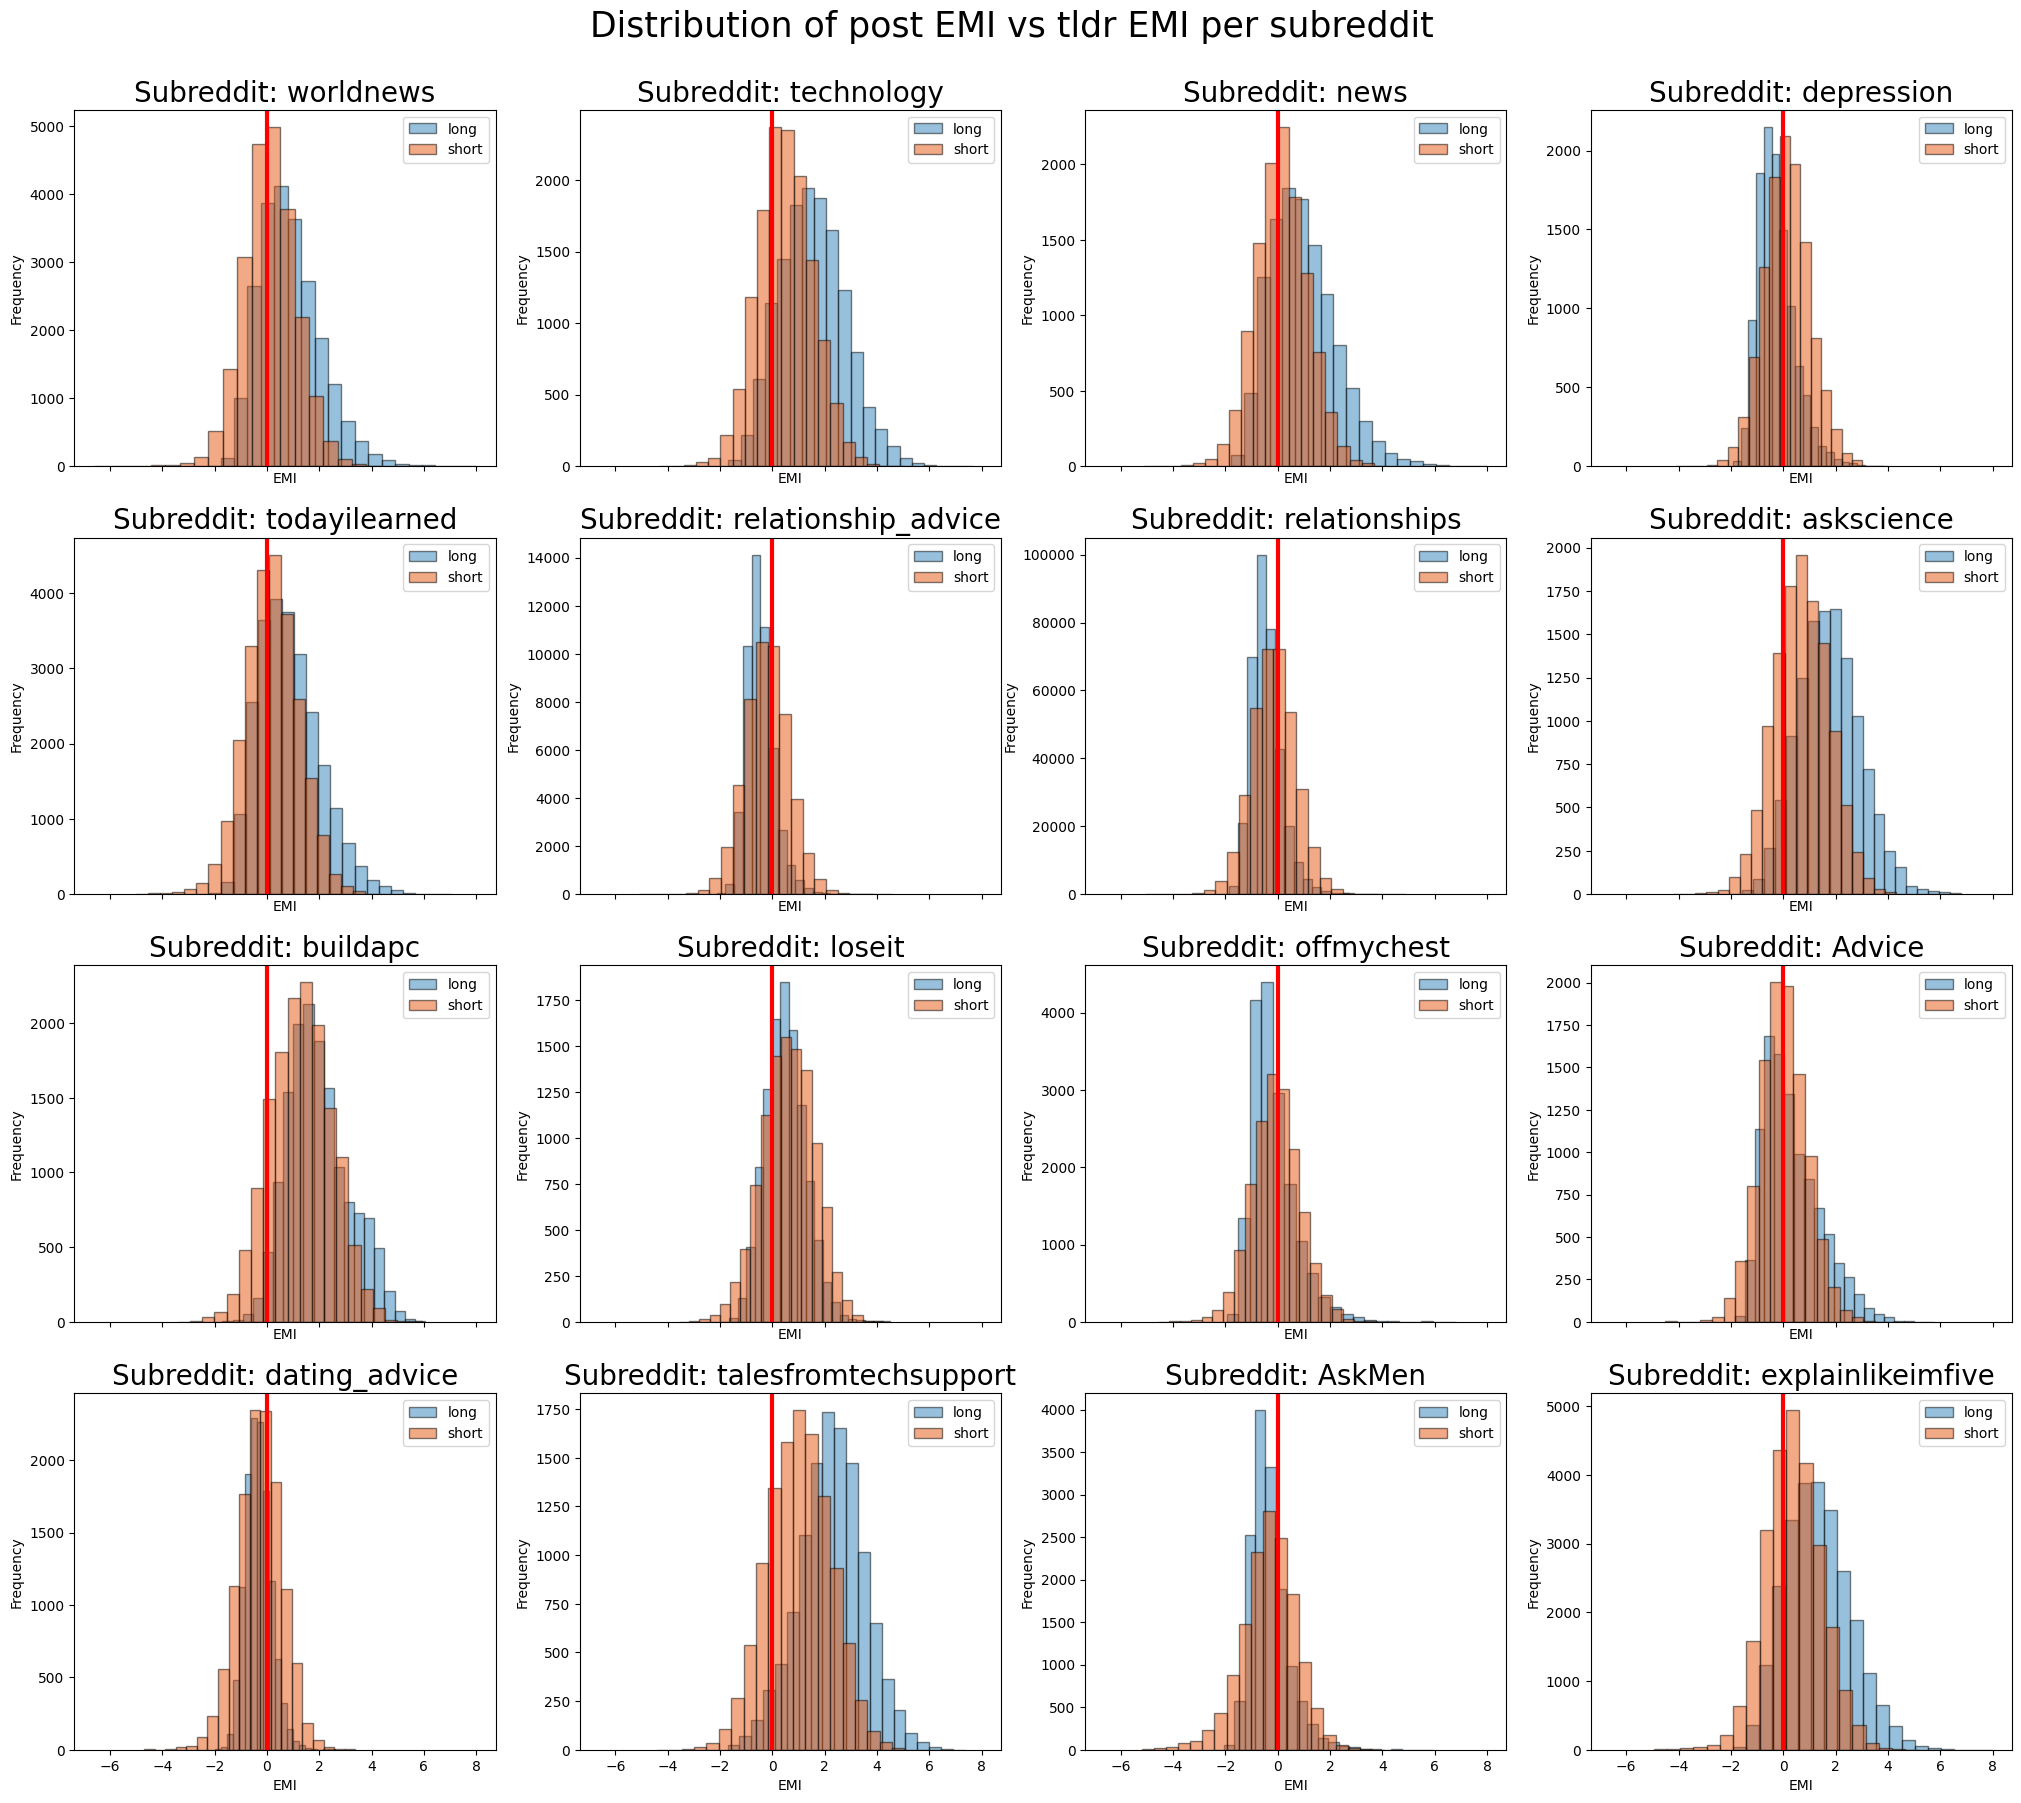

In [11]:
#plt.figure(figsize=(5 * num_subreddits, 15))
fig, axs = plt.subplots(math.ceil(num_subreddits/4),4, figsize=(25, 20), sharex = True)
axs = axs.flatten()
for i, subreddit in enumerate(subreddits):
    #plt.subplot(2, round(num_subreddits/2), i + 1)
    subset_sh = emi_data[emi_data['subreddit'] == subreddit]
    subset = emi_data[emi_data['subreddit'] == subreddit]
    axs[i].hist(subset['emi'], bins=20, color= blue, edgecolor='black', alpha = 0.5, label = 'long')
    axs[i].hist(subset_sh['emi_short'], bins=20, color= orange, edgecolor='black', alpha = 0.5, label = 'short')
    axs[i].set_title(f"Subreddit: {subreddit}", size = 20)
    axs[i].set_xlabel('EMI')
    axs[i].set_ylabel('Frequency')
    axs[i].axvline(0, color = 'red', linewidth = 3)
    axs[i].legend()
fig.suptitle('Distribution of post EMI vs tldr EMI per subreddit', fontsize = 25)
fig.subplots_adjust(top=0.93)
plt.show()

### Comparison base EMI with EMI based on new dictionaries

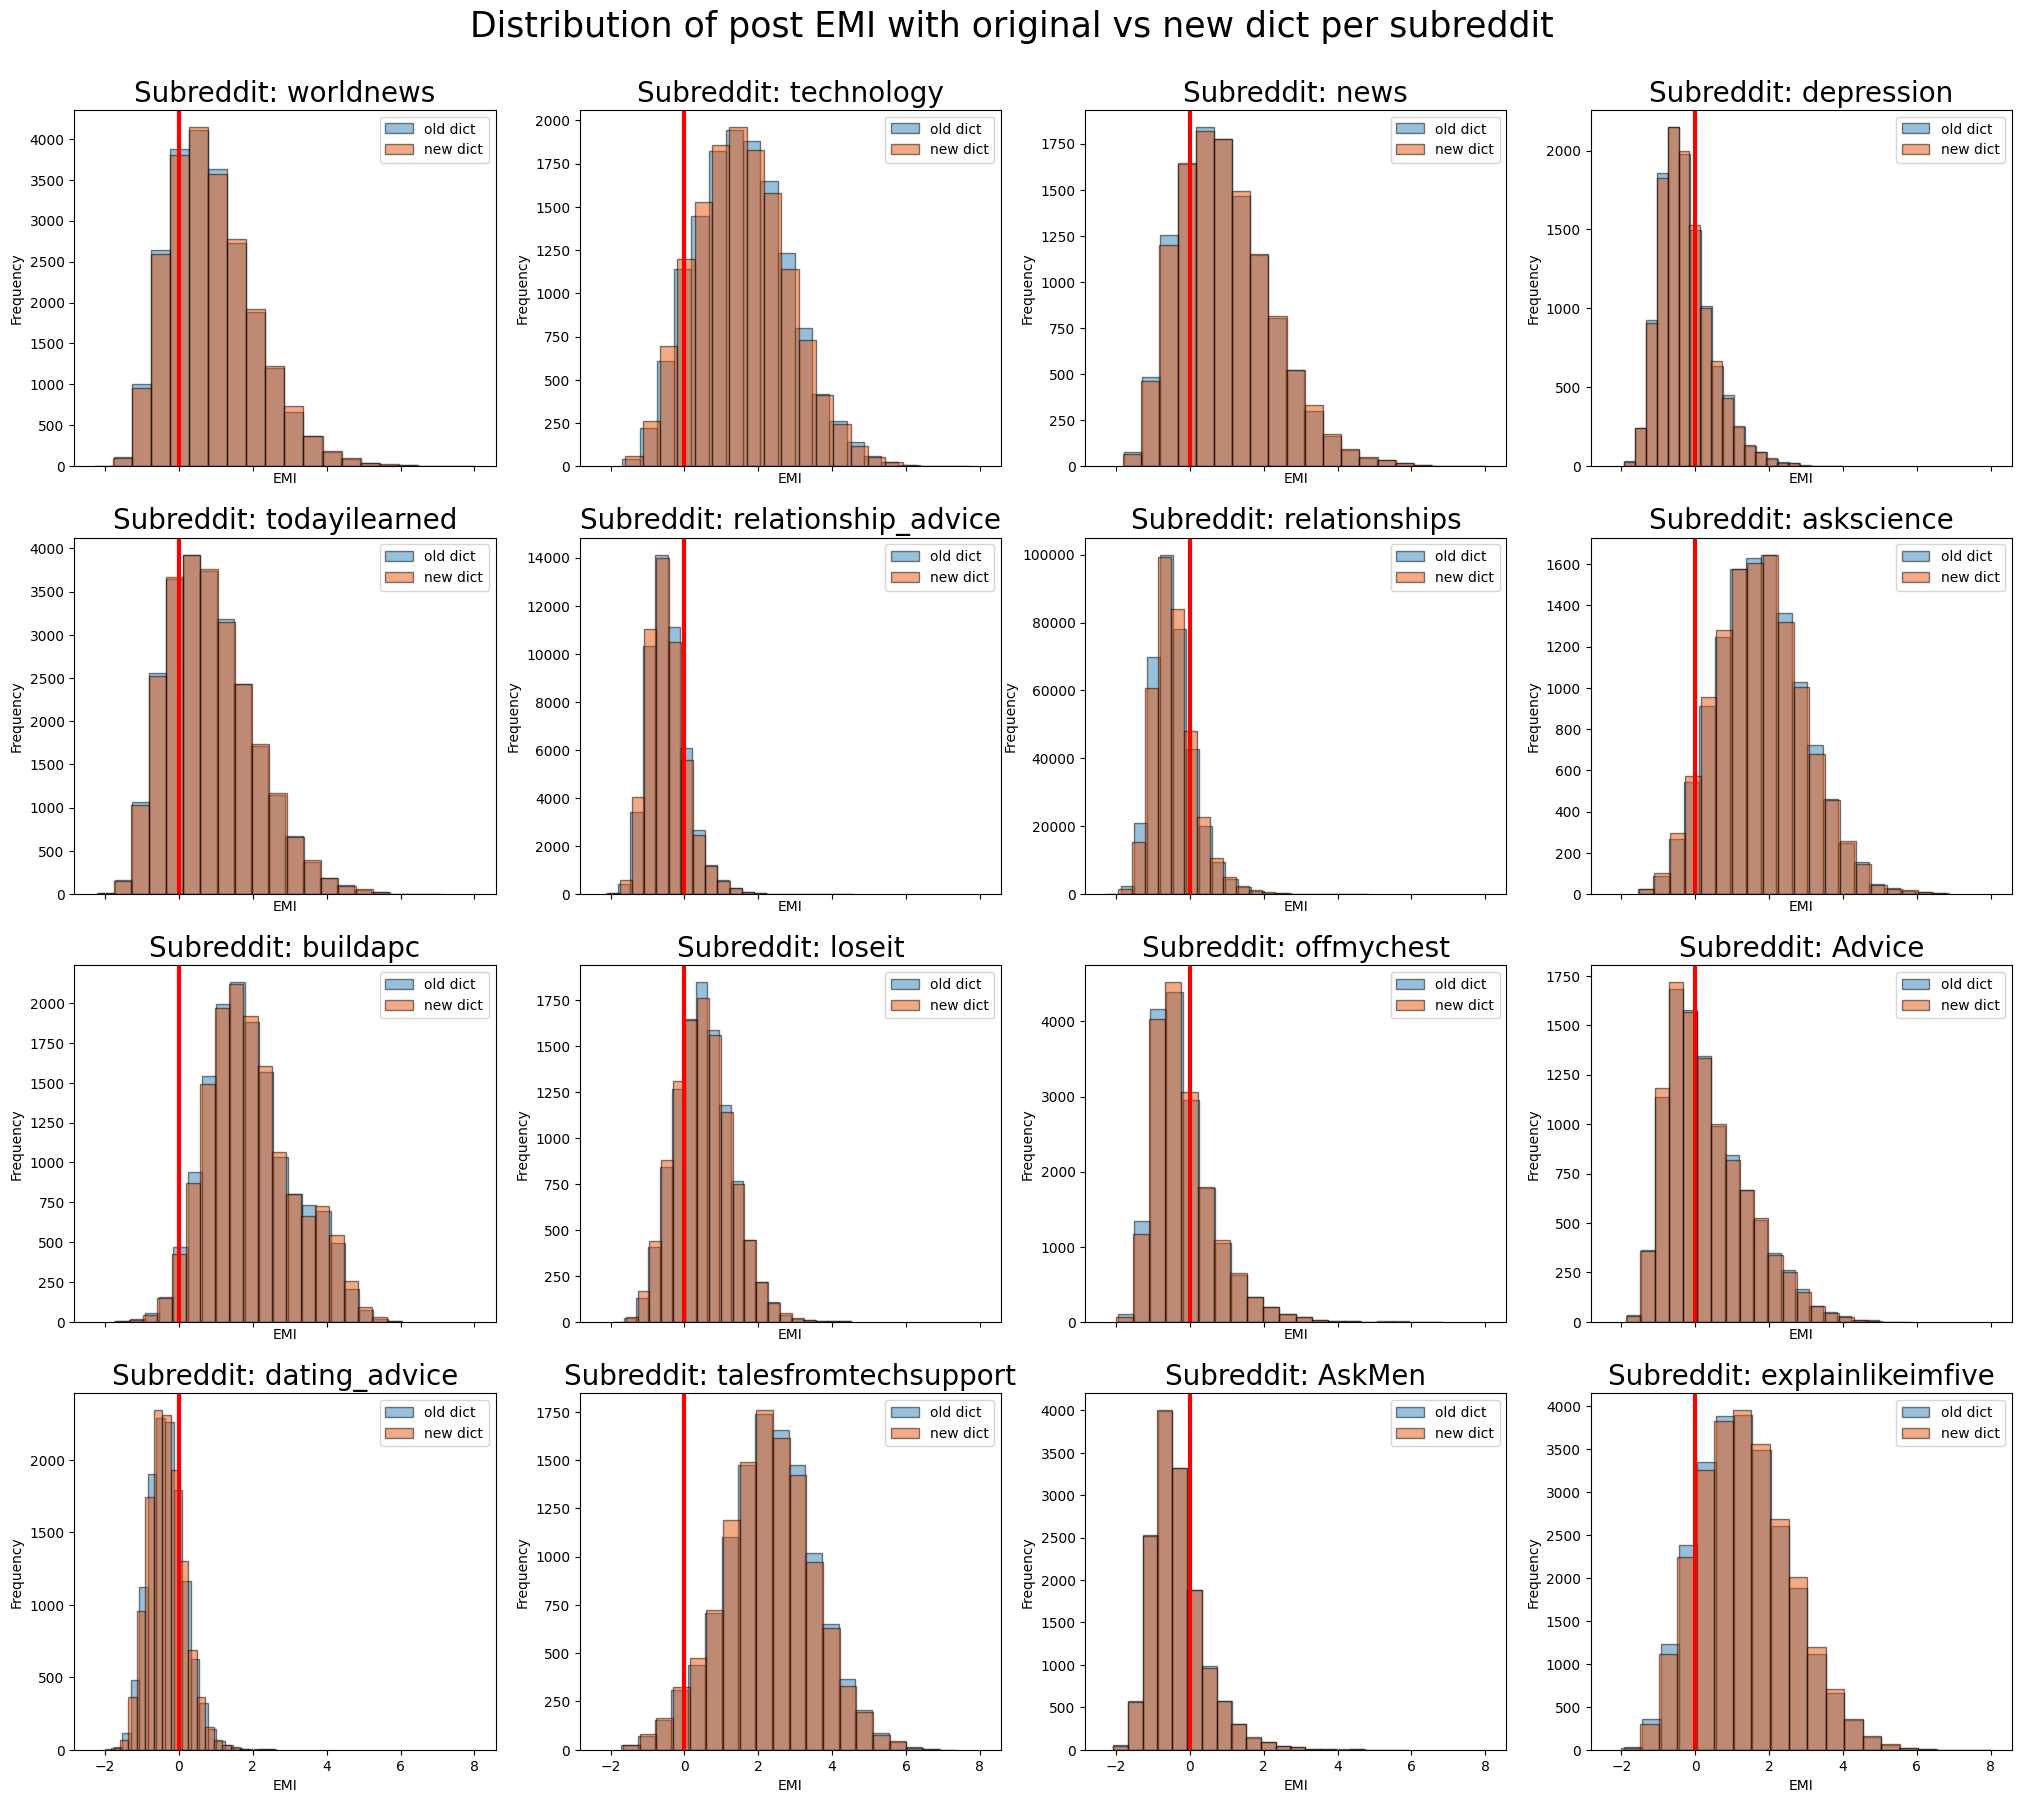

In [13]:
#plt.figure(figsize=(5 * num_subreddits, 15))
fig, axs = plt.subplots(math.ceil(num_subreddits/4),4, figsize=(25, 20), sharex = True)
axs = axs.flatten()
for i, subreddit in enumerate(subreddits):
    #plt.subplot(2, round(num_subreddits/2), i + 1)
    subset_sh = emi_data[emi_data['subreddit'] == subreddit]
    subset = emi_data[emi_data['subreddit'] == subreddit]
    axs[i].hist(subset['emi'], bins=20, color= blue, edgecolor='black', alpha = 0.5, label = 'old dict')
    axs[i].hist(subset_sh['emi_dict'], bins=20, color= orange, edgecolor='black', alpha = 0.5, label = 'new dict')
    axs[i].set_title(f"Subreddit: {subreddit}", size = 20)
    axs[i].set_xlabel('EMI')
    axs[i].set_ylabel('Frequency')
    axs[i].axvline(0, color = 'red', linewidth = 3)
    axs[i].legend()
fig.suptitle('Distribution of post EMI with original vs new dict per subreddit', fontsize = 25)
fig.subplots_adjust(top=0.93)
plt.show()

## Comparison base EMI (on post) vs BERT embedding EMI

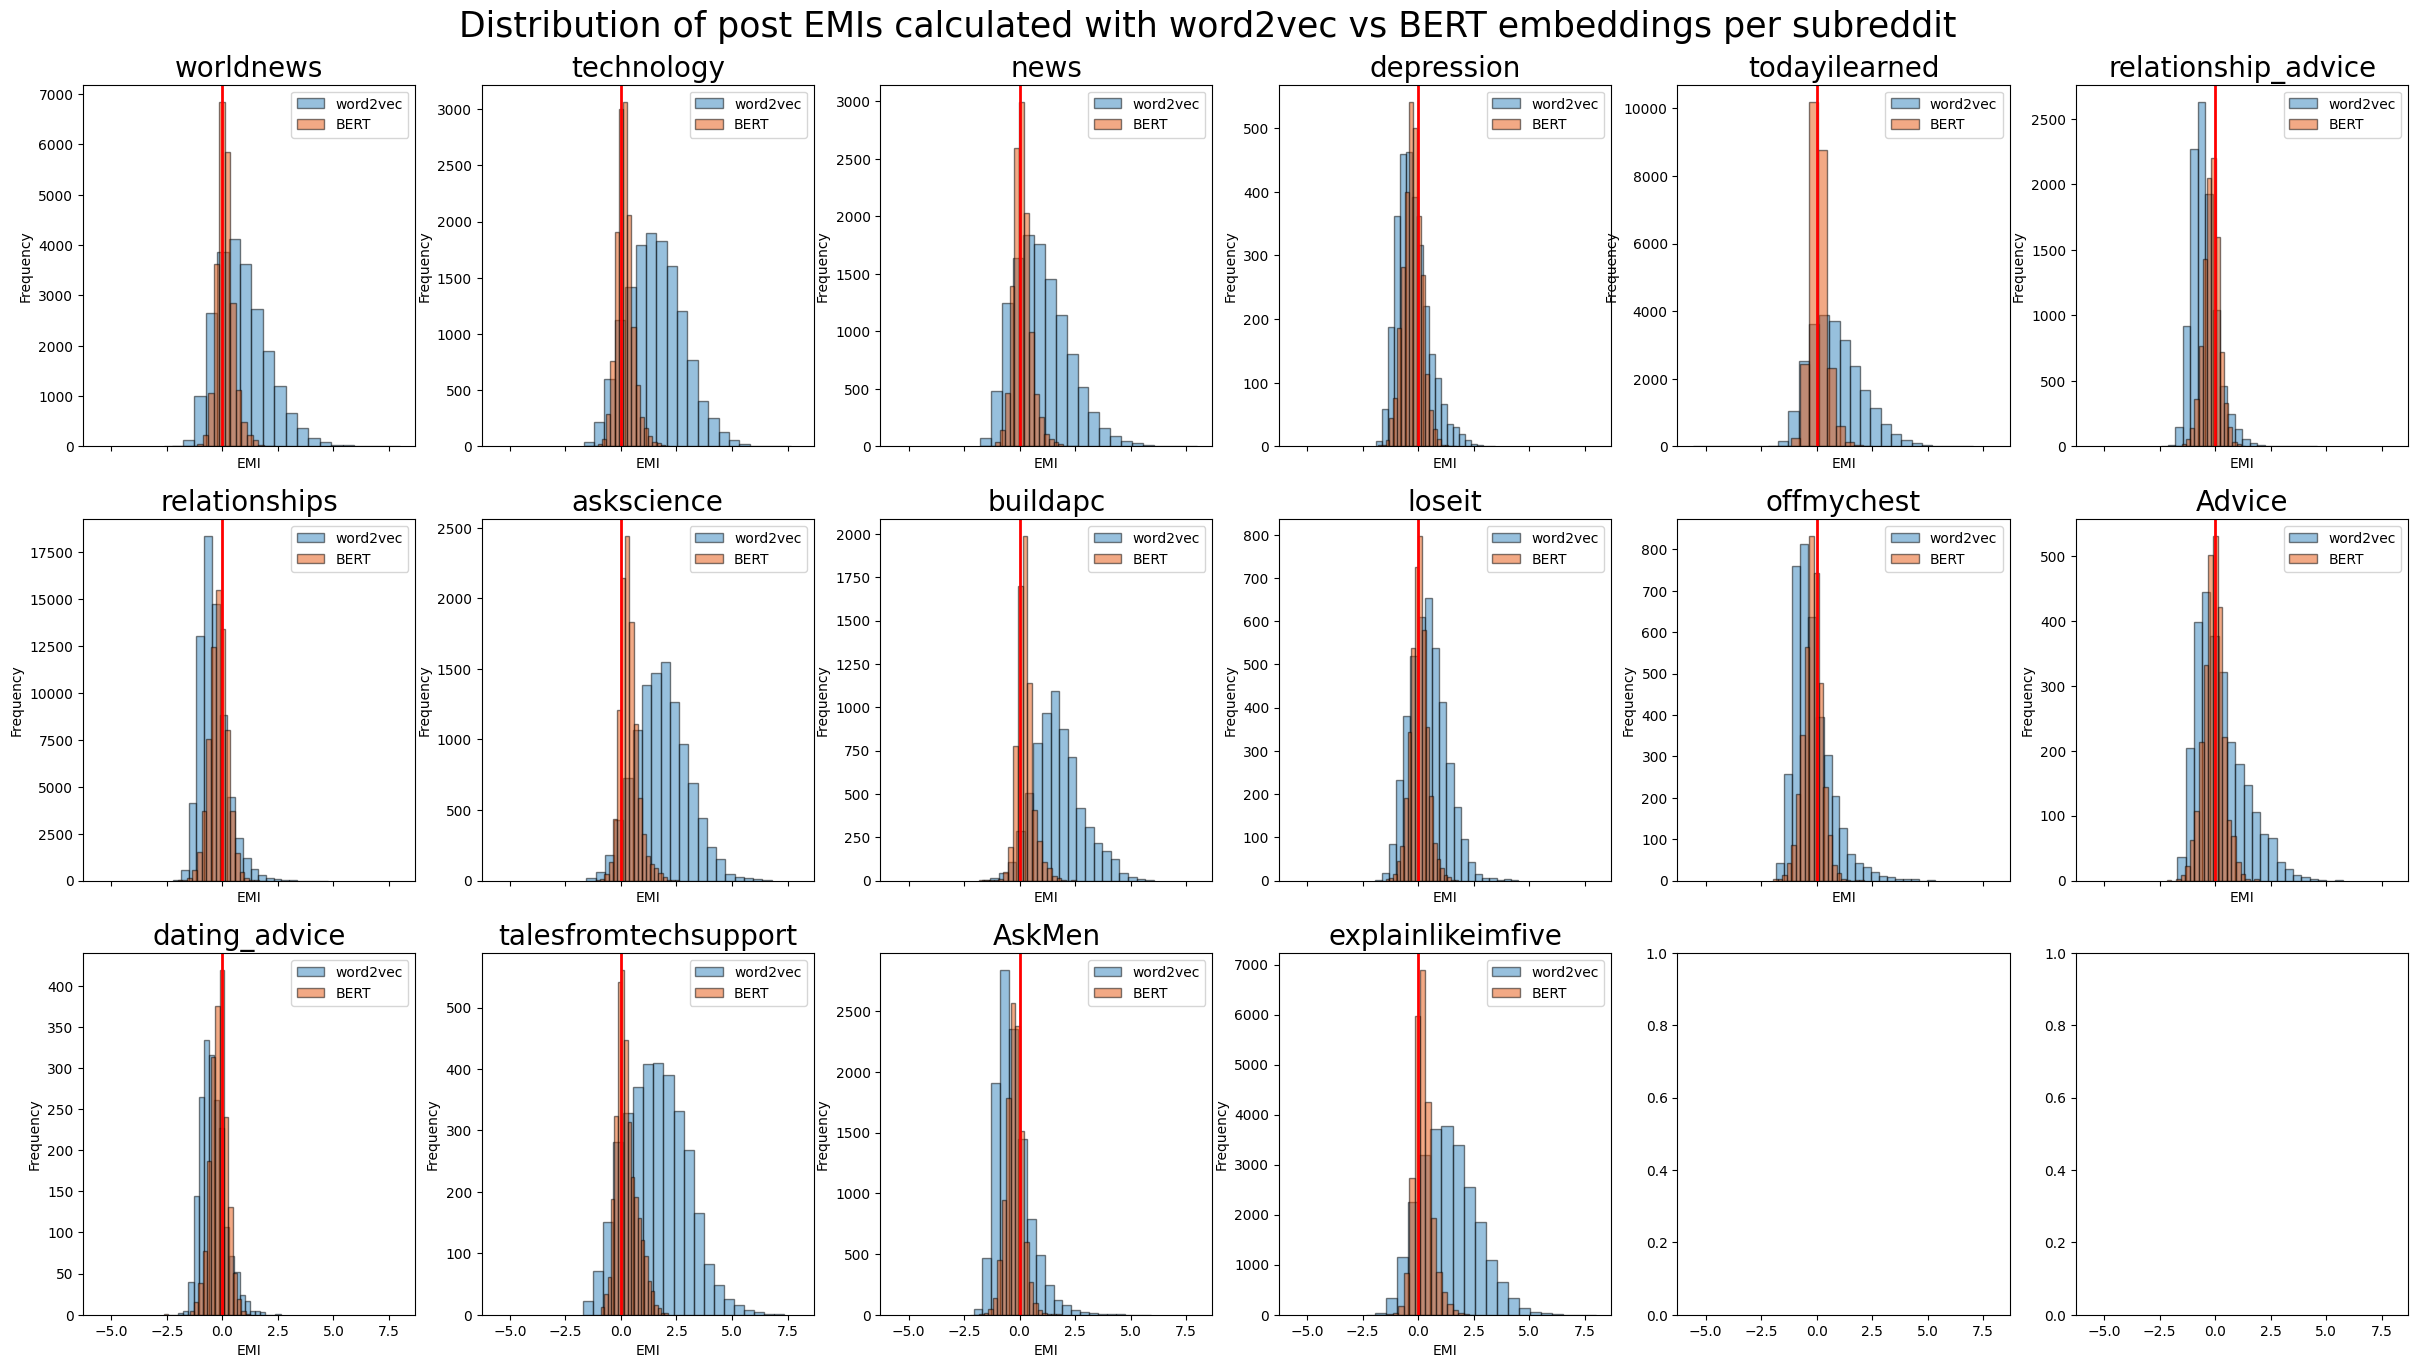

In [23]:
#plt.figure(figsize=(5 * num_subreddits, 15))
#fig, axs = plt.subplots(math.ceil(num_subreddits/4),4, figsize=(25, 20), sharex = True)
fig, axs = plt.subplots(3, 6, figsize=(30,15), sharex=True)
axs = axs.flatten()
for i, subreddit in enumerate(subreddits):
    #plt.subplot(2, round(num_subreddits/2), i + 1)
    subset_sh = emi_data_reducted[emi_data_reducted['subreddit'] == subreddit]
    subset = emi_data_reducted[emi_data_reducted['subreddit'] == subreddit]
    axs[i].hist(subset['emi'], bins=20, color= blue, edgecolor='black', alpha = 0.5, label = 'word2vec')
    axs[i].hist(subset_sh['emi_bert'], bins=20, color= orange, edgecolor='black', alpha = 0.5, label = 'BERT')
    axs[i].set_title(subreddit, size = 20)
    axs[i].set_xlabel('EMI')
    axs[i].set_ylabel('Frequency')
    axs[i].axvline(0, color = 'red', linewidth = 2)
    axs[i].legend()
fig.suptitle('Distribution of post EMIs calculated with word2vec vs BERT embeddings per subreddit', fontsize = 25)
fig.subplots_adjust(top=0.93)
plt.show()

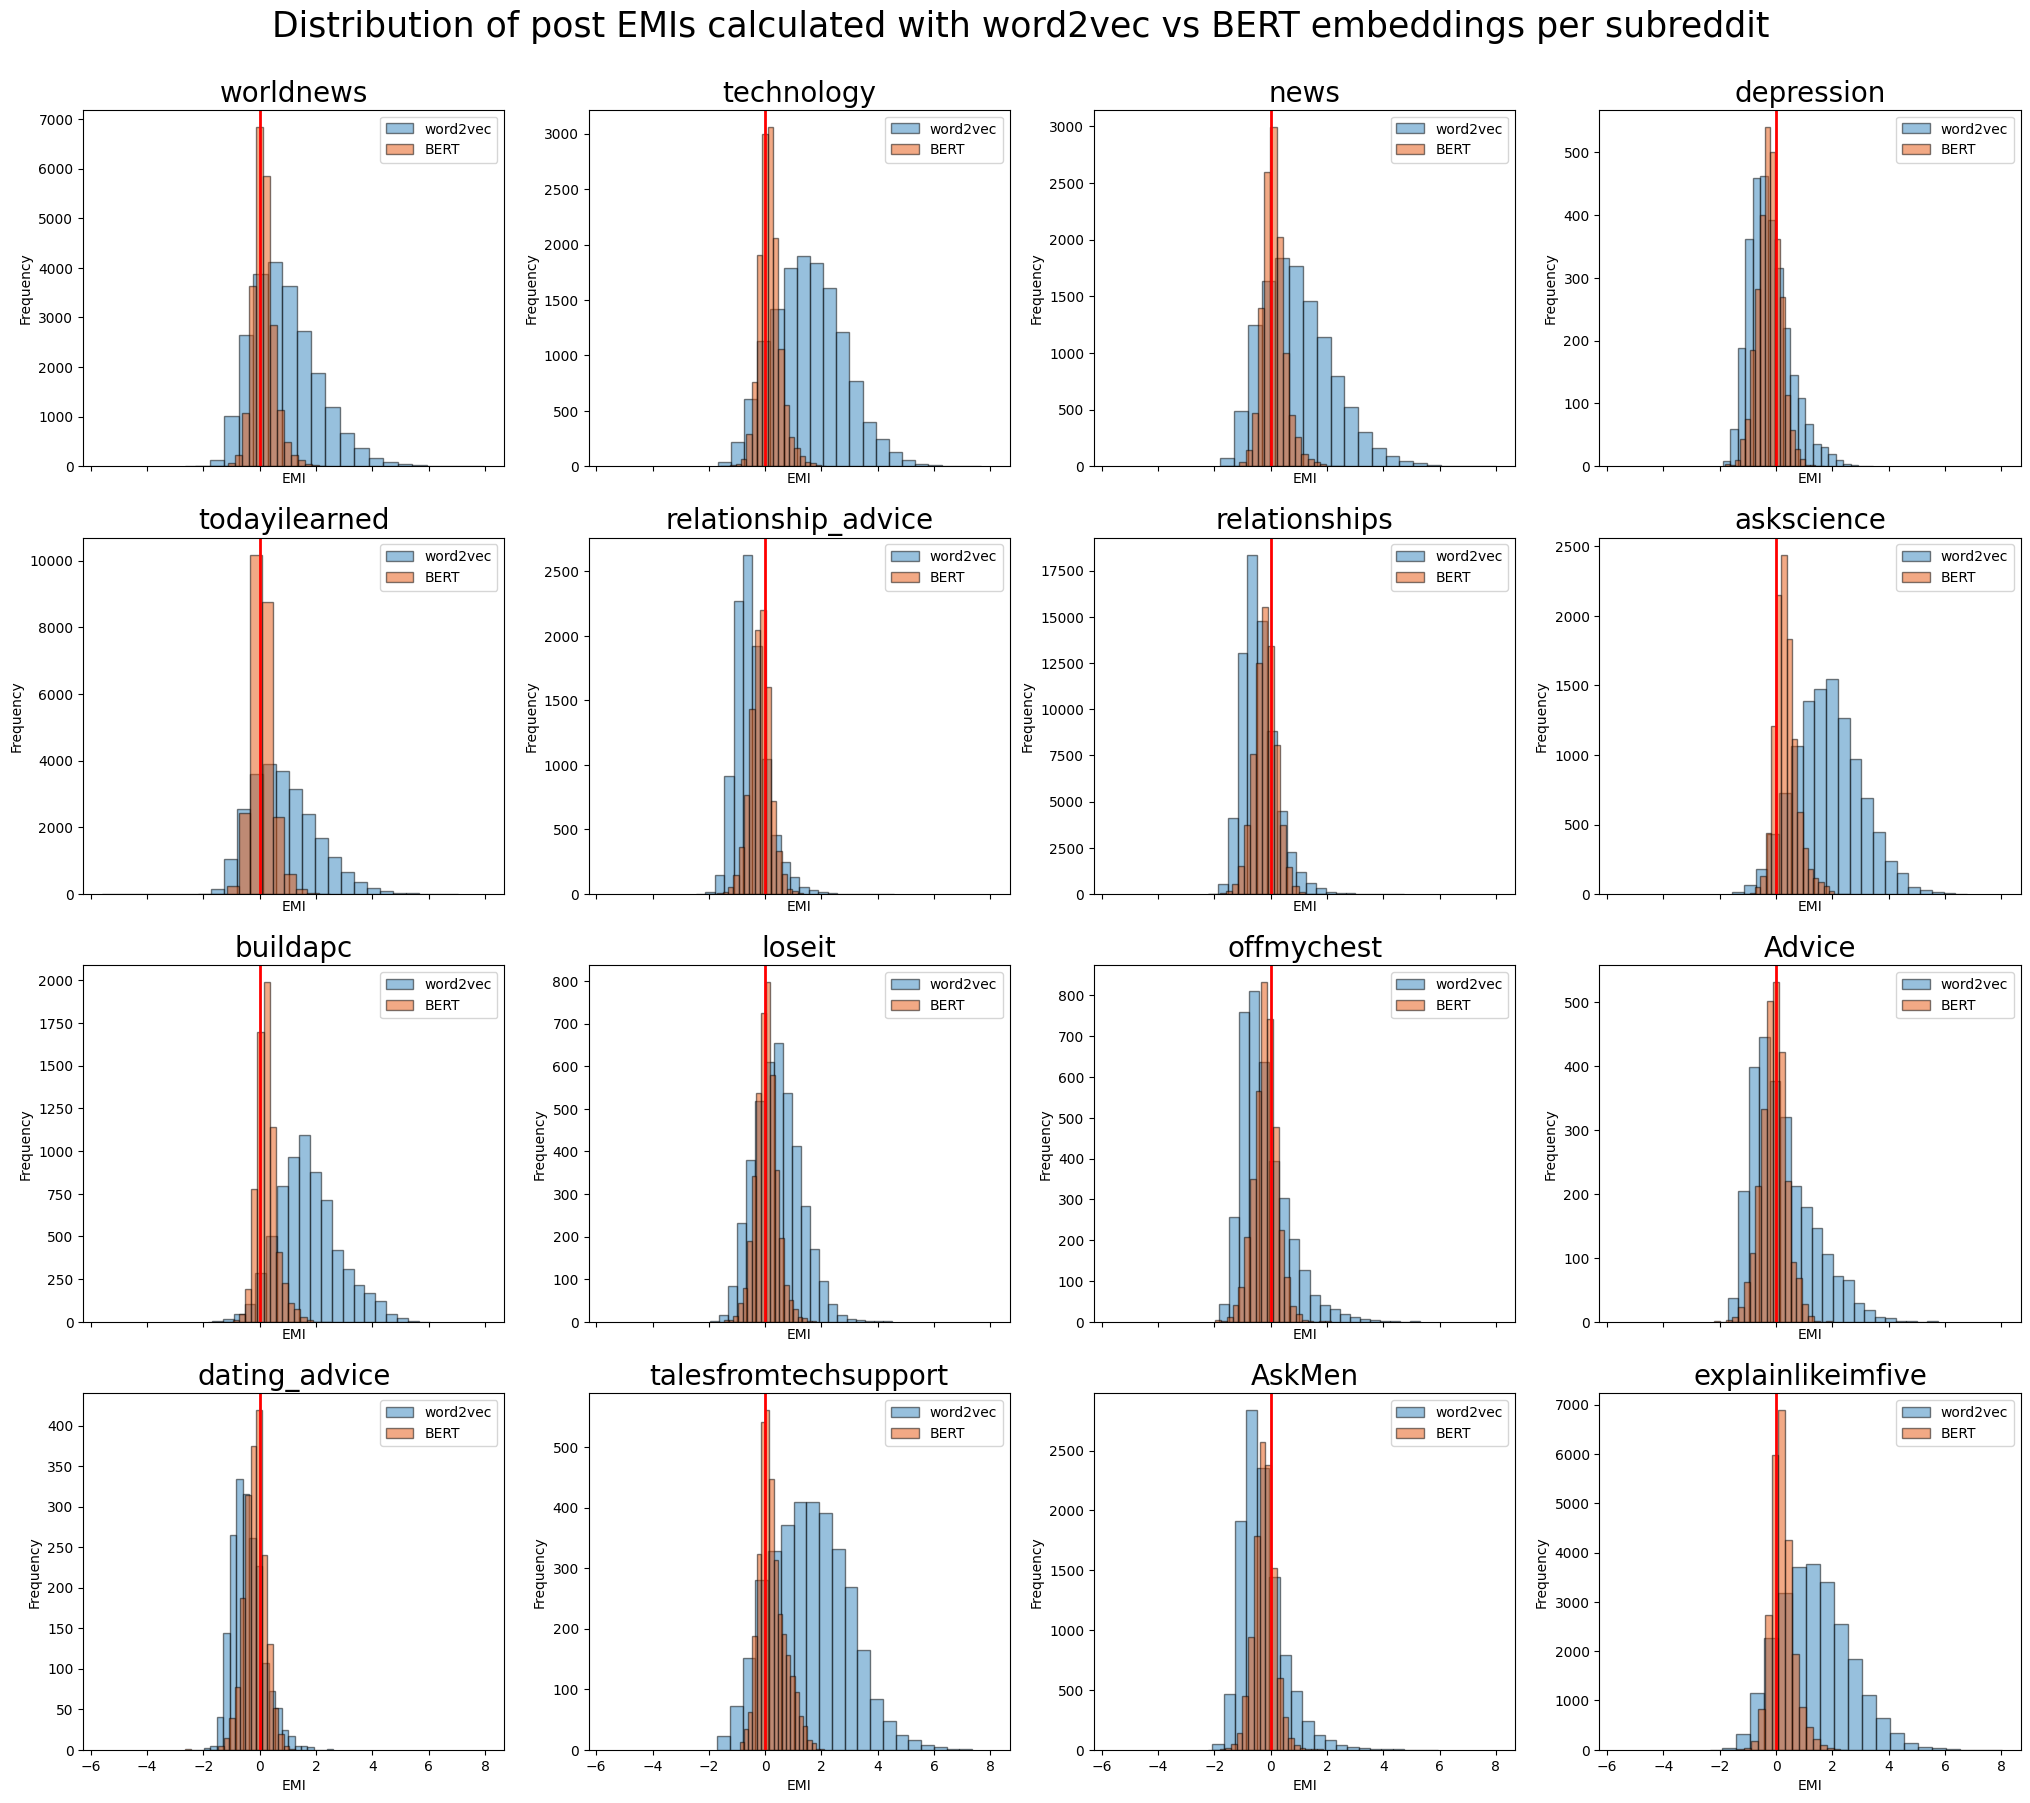

In [12]:
#plt.figure(figsize=(5 * num_subreddits, 15))
#fig, axs = plt.subplots(math.ceil(num_subreddits/4),4, figsize=(25, 20), sharex = True)
fig, axs = plt.subplots(4, 4, figsize=(25,20), sharex=True)
axs = axs.flatten()
for i, subreddit in enumerate(subreddits):
    #plt.subplot(2, round(num_subreddits/2), i + 1)
    subset_sh = emi_data_reducted[emi_data_reducted['subreddit'] == subreddit]
    subset = emi_data_reducted[emi_data_reducted['subreddit'] == subreddit]
    axs[i].hist(subset['emi'], bins=20, color= blue, edgecolor='black', alpha = 0.5, label = 'word2vec')
    axs[i].hist(subset_sh['emi_bert'], bins=20, color= orange, edgecolor='black', alpha = 0.5, label = 'BERT')
    axs[i].set_title(subreddit, size = 20)
    axs[i].set_xlabel('EMI')
    axs[i].set_ylabel('Frequency')
    axs[i].axvline(0, color = 'red', linewidth = 2)
    axs[i].legend()
fig.suptitle('Distribution of post EMIs calculated with word2vec vs BERT embeddings per subreddit', fontsize = 25)
fig.subplots_adjust(top=0.93)
plt.show()

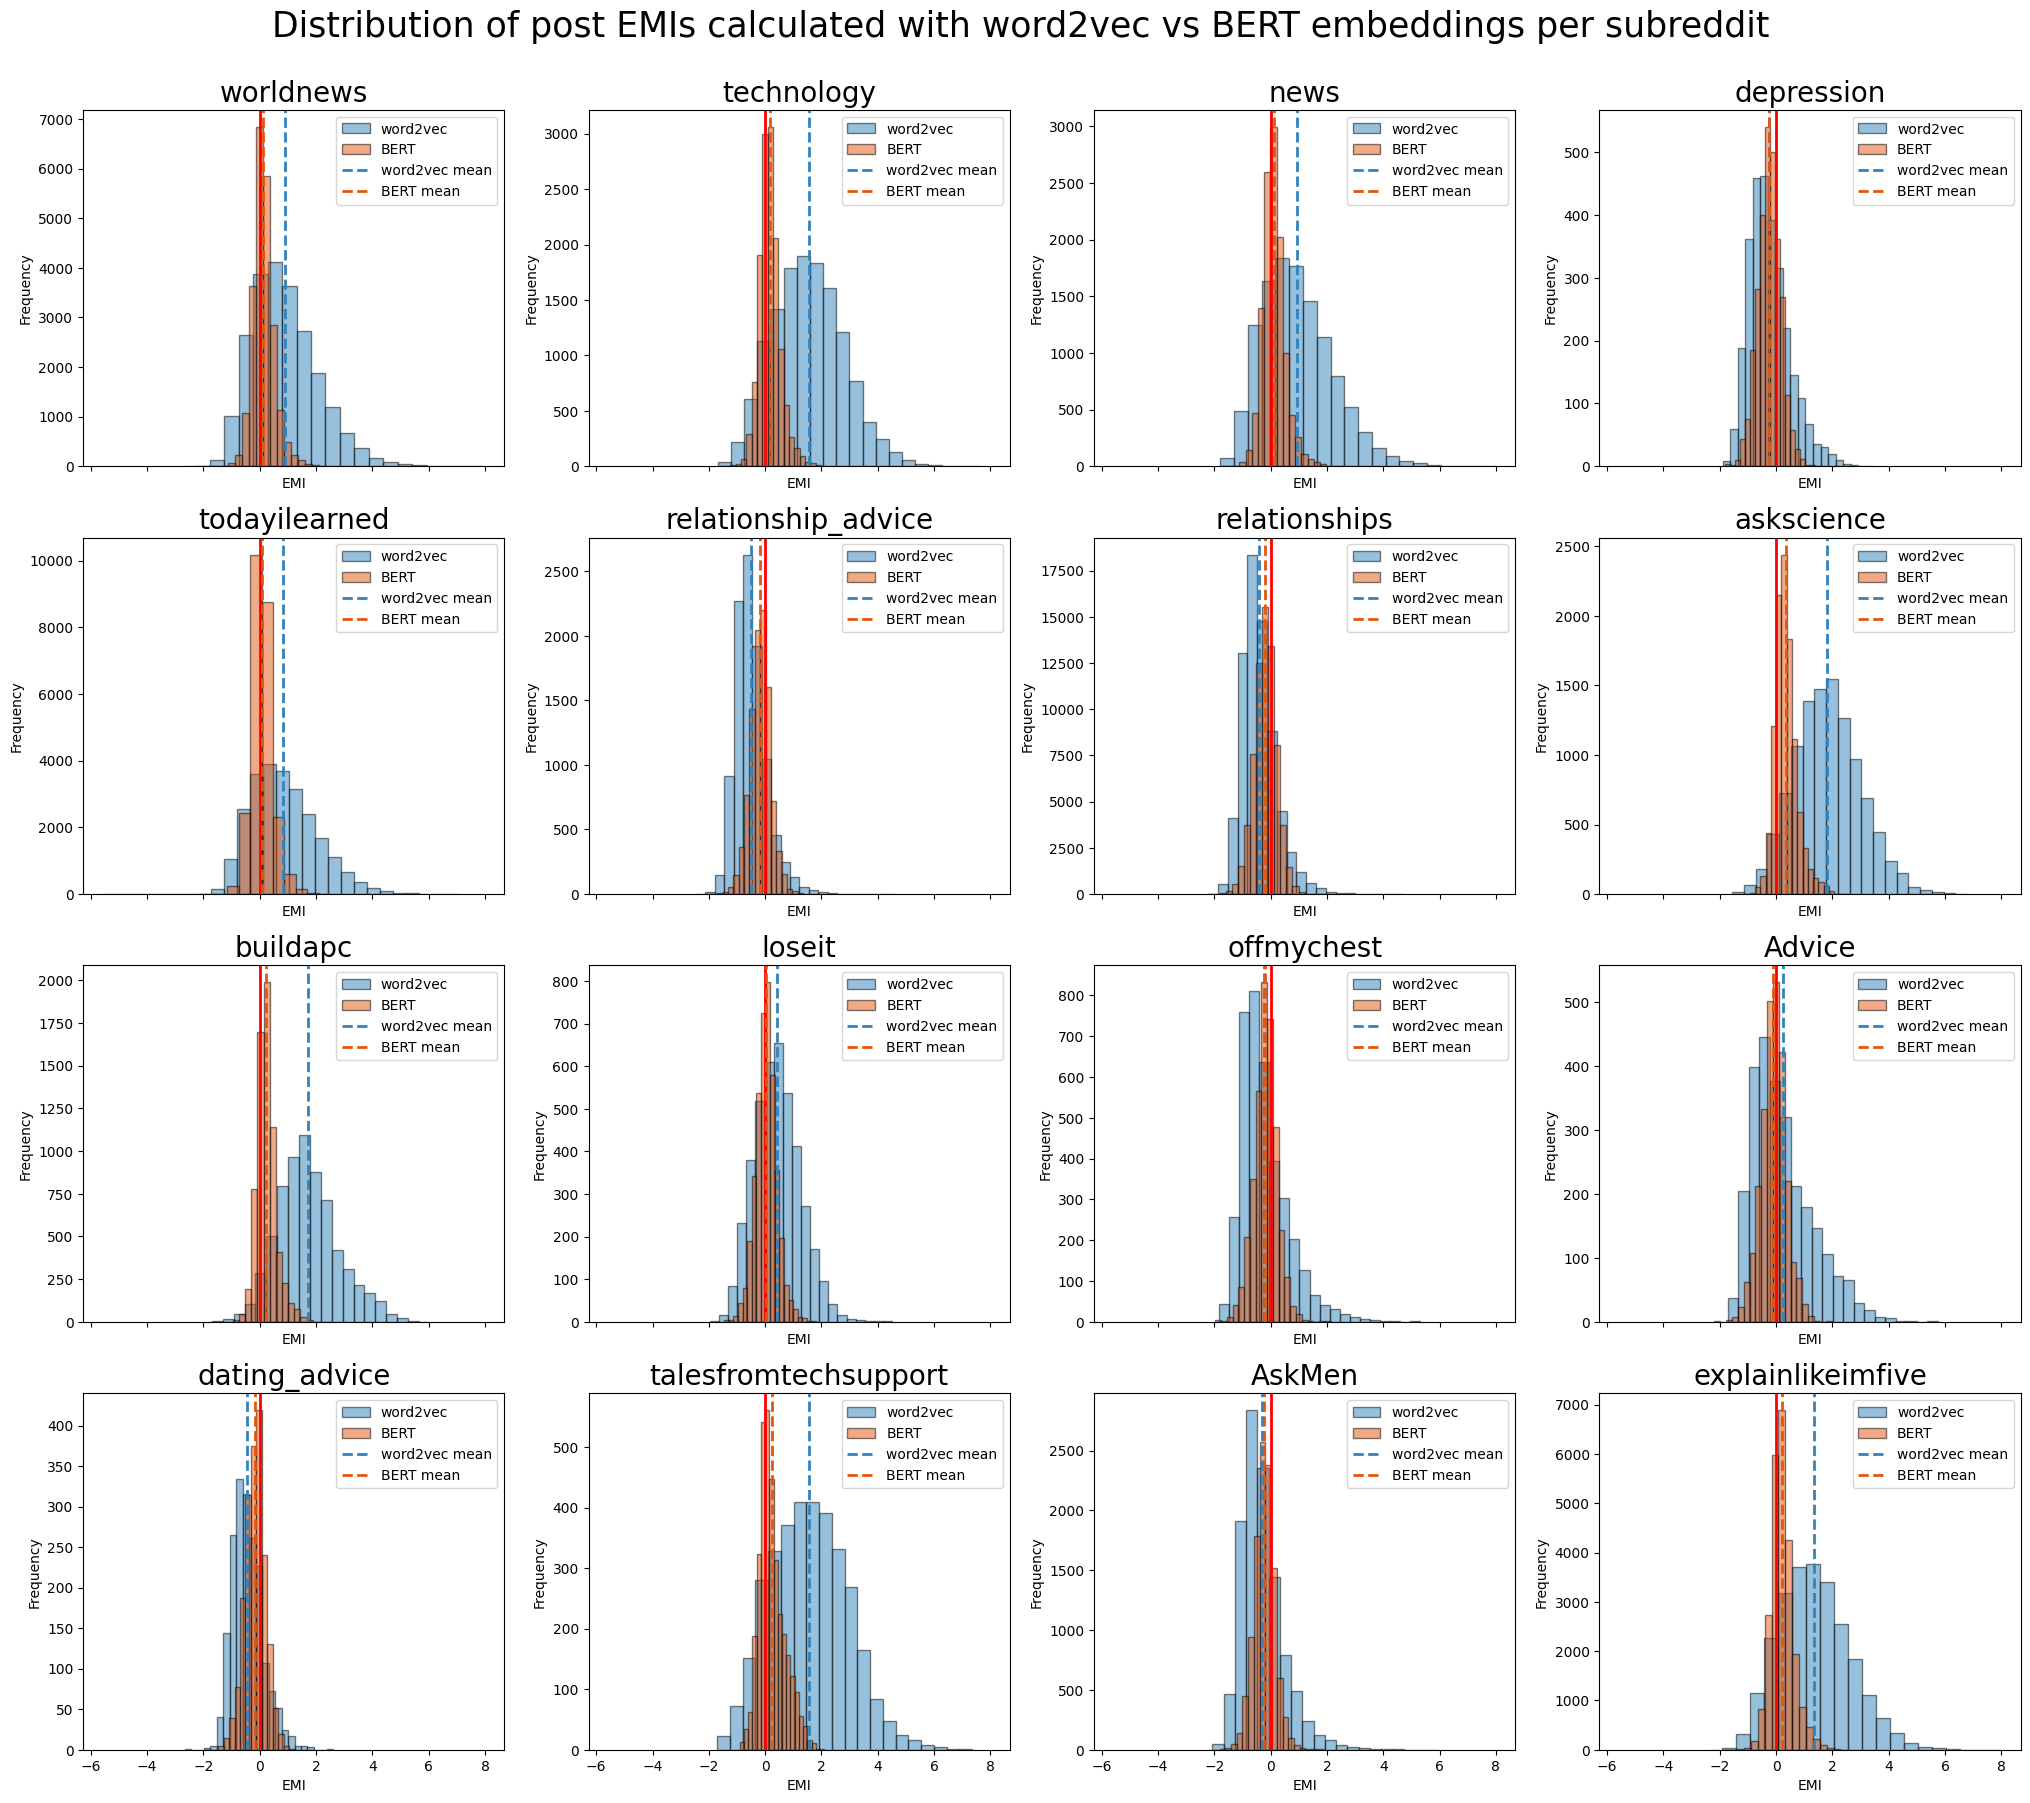

In [24]:
# Variation of the upper graphic:
fig, axs = plt.subplots(math.ceil(num_subreddits / 4), 4, figsize=(25, 20), sharex=True)
axs = axs.flatten()

for i, subreddit in enumerate(subreddits):
    subset = emi_data_reducted[emi_data_reducted['subreddit'] == subreddit]
    
    # Plot histograms
    axs[i].hist(subset['emi'], bins=20, color=blue, edgecolor='black', alpha=0.5, label='word2vec')
    axs[i].hist(subset['emi_bert'], bins=20, color=orange, edgecolor='black', alpha=0.5, label='BERT')
    
    # Add vertical line at zero
    axs[i].axvline(0, color='red', linewidth=2)
    
    # Add dashed lines for the means
    emi_mean = subset['emi'].mean()
    emi_bert_mean = subset['emi_bert'].mean()
    axs[i].axvline(emi_mean, color=blue, linestyle='--', linewidth=2, label='word2vec mean')
    axs[i].axvline(emi_bert_mean, color=orange, linestyle='--', linewidth=2, label='BERT mean')

    # Formatting
    axs[i].set_title(subreddit, size=20)
    axs[i].set_xlabel('EMI')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

# Super title and layout
fig.suptitle('Distribution of post EMIs calculated with word2vec vs BERT embeddings per subreddit', fontsize=25)
fig.subplots_adjust(top=0.93)
plt.show()

## Correlation between EMI approaches

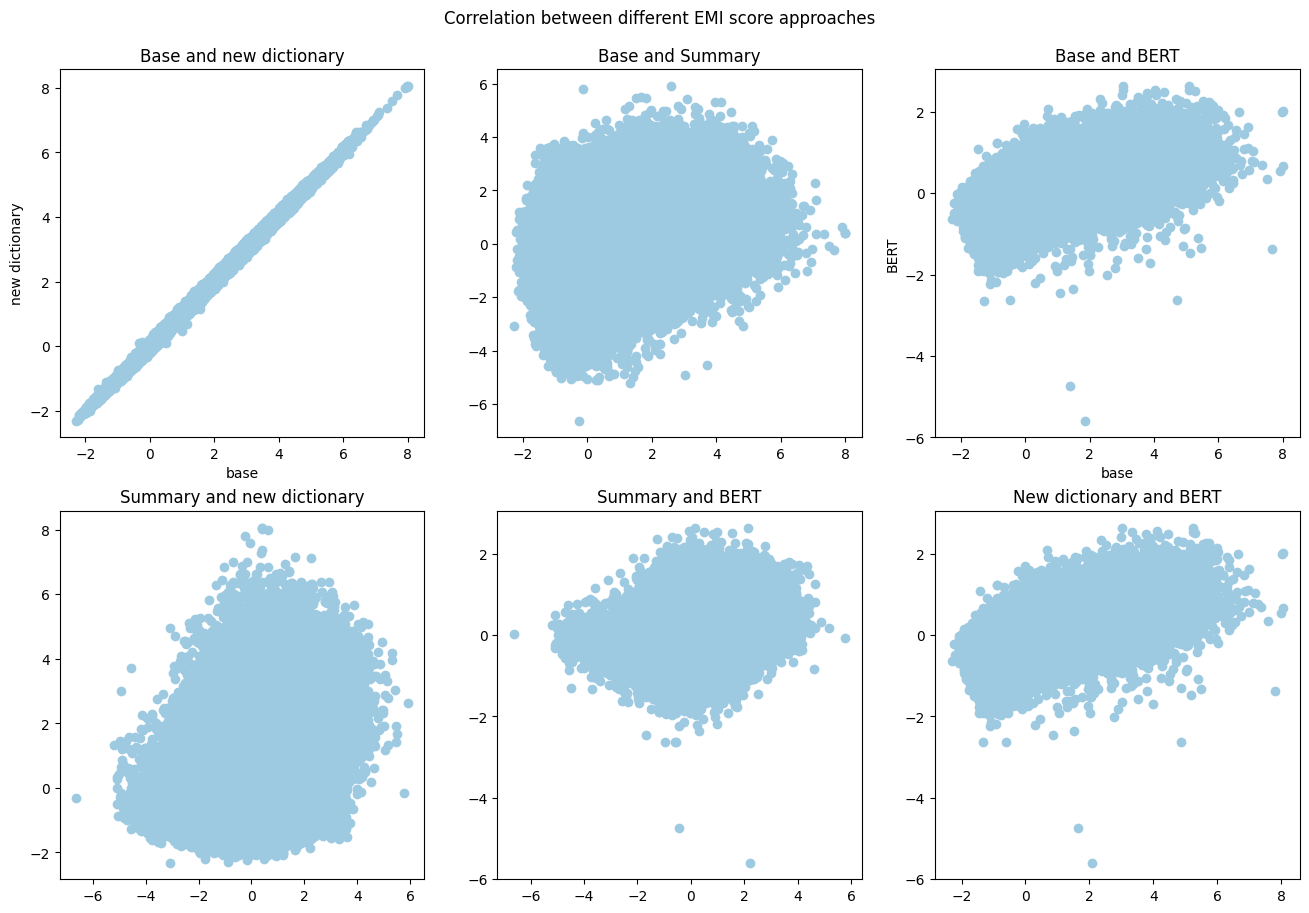

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

blue = new_colors(2)
fig, axs = plt.subplots(2,3, figsize=(16, 10))#, sharex = True, sharey = True)

axs[0,0].scatter(emi_data['emi'], emi_data['emi_dict'], color=blue)
axs[0,0].set_title('Base and new dictionary')
axs[0, 0].set_xlabel('base')
axs[0, 0].set_ylabel('new dictionary')

axs[0,1].scatter(emi_data['emi'], emi_data['emi_short'], color=blue)
axs[0,1].set_title('Base and Summary')

axs[0,2].scatter(emi_data['emi'], emi_data['emi_bert'], color=blue)
axs[0,2].set_title('Base and BERT')
axs[0, 2].set_xlabel('base')
axs[0, 2].set_ylabel('BERT')

axs[1,0].scatter(emi_data['emi_short'], emi_data['emi_dict'], color=blue)
axs[1,0].set_title('Summary and new dictionary')

axs[1,1].scatter(emi_data['emi_short'], emi_data['emi_bert'], color=blue)
axs[1,1].set_title('Summary and BERT')

axs[1,2].scatter(emi_data['emi_dict'], emi_data['emi_bert'], color=blue)
axs[1,2].set_title('New dictionary and BERT')

fig.suptitle('Correlation between different EMI score approaches')
fig.subplots_adjust(top=0.92)
plt.show()

In [14]:
emi_data

,subreddit,subreddit_id,id,emi,emi_short,emi_dict,emi_bert,diff
0,worldnews,t5_2qh13,2ef5,-0.133635,-0.990069,-0.171608,-0.061480,0.856434
1,technology,t5_2qh16,5n0a,0.238289,0.932410,0.258639,0.140866,-0.694121
2,news,t5_2qh3l,71no,0.197142,-0.266843,0.113814,0.389299,0.463985
3,depression,t5_2qqqf,802k,-0.266380,-0.213134,-0.253383,0.659833,-0.053246
4,technology,t5_2qh16,amaz,1.547950,2.486575,1.582274,0.192084,-0.938625
...,...,...,...,...,...,...,...,...
615387,AskMen,t5_2s30g,t3_zzwq2,0.447433,-0.673665,0.411636,NaN,1.121097
615388,buildapc,t5_2rnve,t3_zzyai,3.339368,-0.350016,3.409126,NaN,3.689384
615389,relationships,t5_2qjvn,t3_zzzd6,0.077625,0.568103,0.116399,NaN,-0.490477
615390,relationships,t5_2qjvn,t3_zzzn3,-0.240569,-0.353285,-0.306116,NaN,0.112716


In [19]:
mean_subreddit_emi_df = emi_data.groupby("subreddit")[["emi", "emi_short", "emi_dict", "emi_bert"]].mean().reset_index()


In [15]:
import pickle
# new created evidence and inutition sets 
with open("../preprocessing_EMI/selection_emi_expect.pkl", "rb") as f:
    selection_emi_expect = pickle.load(f)

In [ ]:
mean_subreddit_emi_df["expectation"] = mean_subreddit_emi_df["subreddit"].map(selection_emi_expect)
mean_subreddit_emi_df["guess"] = mean_subreddit_emi_df.apply(
    lambda row: (
        True if (row["expectation"] == "intuition" and row["emi"] < 0)
        else True if (row["expectation"] == "evidence" and row["emi"] > 0)
        else False
    ),
    axis=1
)


In [27]:
mean_subreddit_emi_df

,subreddit,emi,emi_short,emi_dict,emi_bert,expectation,guess
0,Advice,0.339718,0.006631,0.333999,-0.092573,intuition,False
1,AskMen,-0.330552,-0.330662,-0.333857,-0.226084,intuition,True
2,askscience,1.753339,0.692008,1.769951,0.343264,evidence,True
3,buildapc,1.961137,1.293441,1.965890,0.232905,evidence,True
4,dating_advice,-0.324222,-0.270277,-0.346307,-0.172131,intuition,True
5,depression,-0.267058,0.149373,-0.268941,-0.260357,intuition,True
6,explainlikeimfive,1.327834,0.396334,1.354175,0.205109,evidence,True
7,loseit,0.502032,0.616786,0.520622,0.030121,intuition,False
8,news,0.950472,0.152814,0.974475,0.103567,evidence,True
9,offmychest,-0.167925,-0.067313,-0.173061,-0.190736,intuition,True
